#6.1

In [ ]:
import pandas as pd

df = pd.read_csv('./advertising.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [ ]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


#6.2

<Axes: xlabel='Age', ylabel='Count'>

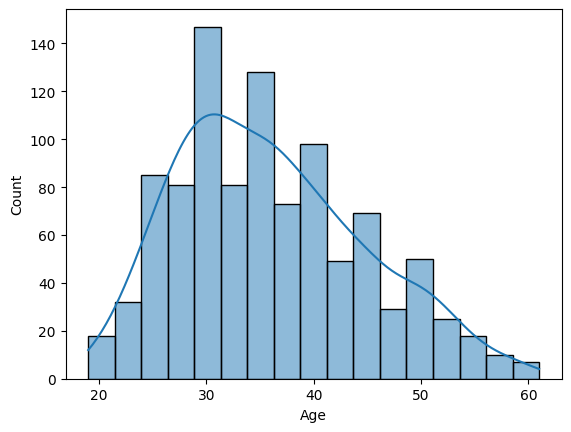

In [ ]:
import seaborn as sns

sns.histplot(df['Age'], kde=True)

#6.3

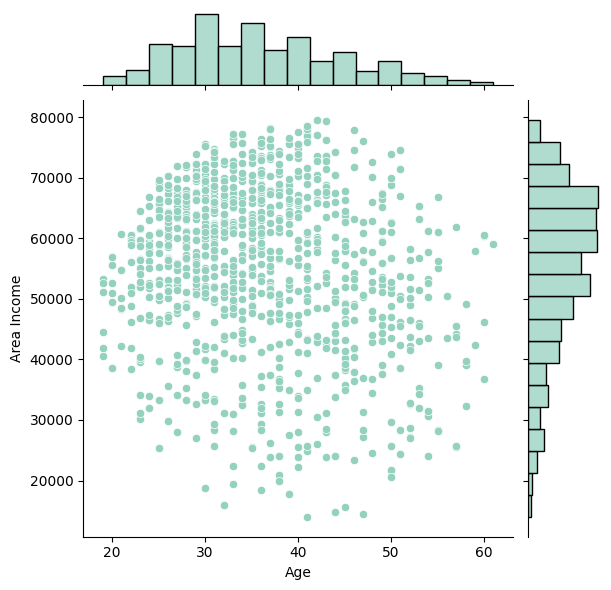

In [ ]:
sns.set_palette('GnBu_d')
sns.jointplot(data=df, y='Area Income', x='Age')

#6.4

<Axes: xlabel='Age', ylabel='Daily Time Spent on Site'>

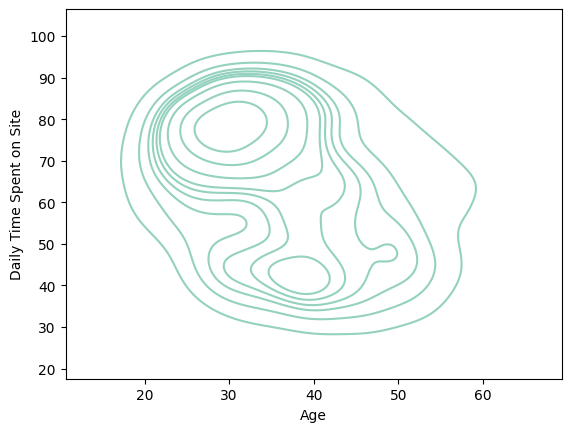

In [ ]:
sns.kdeplot(data=df, y='Daily Time Spent on Site', x='Age')

#6.5

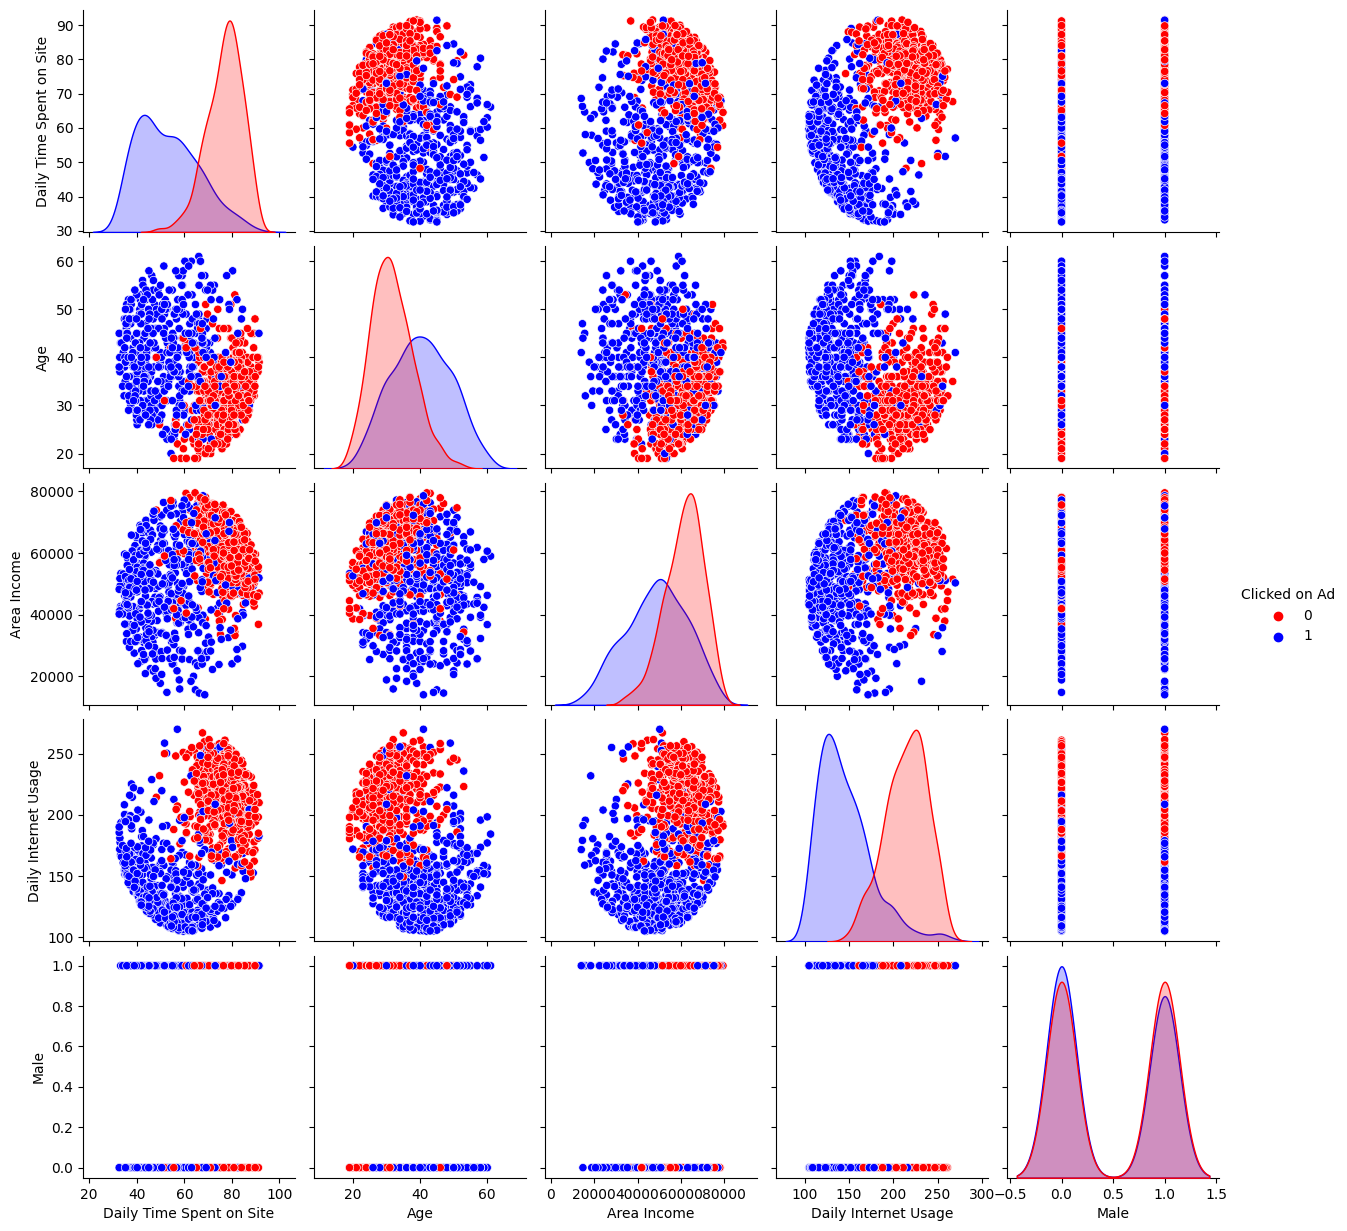

In [ ]:
sns.pairplot(data=df, hue='Clicked on Ad', palette={0:'r', 1: 'b'})

#6.7

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']]
y = df['Clicked on Ad']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape)

(700, 5)


#6.8

In [ ]:
import numpy as np

class LogisticReg:
    def __init__(self, X, y, epochs=1000, alpha=0.01):
        # add one more dim to input (bias)
        self.X = np.hstack((np.ones((X.shape[0], 1)), X))
        self.y = y

        # initialize weights
        self.W = np.zeros((self.X.shape[1], 1))

        self.epochs = epochs
        self.alpha = alpha

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def forward(self, X):
        z = np.dot(X, self.W)
        return self.sigmoid(z)

    def loss(self, y_hat, y):
        l = -1 * np.average(y * np.log(y_hat) + (1-y) * np.log(1-y_hat))
        return l

    def grads(self, X, y_hat, y):
        # round L/round w = x (y_hat - y)
        return np.dot(X.T, np.expand_dims(y_hat-y, axis=1)) / len(y)

    def train(self):

        for e in range(self.epochs):
            # forward propagation
            y_hat = np.squeeze(self.forward(self.X))
            # compute loss
            l = self.loss(y_hat, self.y)
            # compute gradients
            dw = self.grads(self.X, y_hat, self.y)
            # update parameters
            self.W -= self.alpha * dw

            if e % 100 == 0:
                print(f'Epoch {e}, Loss:', "{:.3f}".format(l))

    def predict(self, X):
        # add one more dimension
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        probs = self.forward(X)
        preds = (probs >= 0.5).astype(int)
        return preds


In [ ]:
model = LogisticReg(X_train, y_train)
model.train()

Epoch 0, Loss: 0.693
Epoch 100, Loss: 0.424
Epoch 200, Loss: 0.311
Epoch 300, Loss: 0.253
Epoch 400, Loss: 0.219
Epoch 500, Loss: 0.196
Epoch 600, Loss: 0.180
Epoch 700, Loss: 0.168
Epoch 800, Loss: 0.159
Epoch 900, Loss: 0.151


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

pred_train = model.predict(X_train)
acc_train = accuracy_score(y_train, pred_train)
print("Train Accuracy", "{:.3f}".format(acc_train))

Train Accuracy 0.969


#6.9

In [ ]:
pred_test = model.predict(X_test)
pred_test.shape

(300, 1)

#6.10

In [ ]:
pred_test = model.predict(X_test)
acc_test = accuracy_score(y_test, pred_test)
print("Test Accuracy", "{:.3f}".format(acc_test))

Test Accuracy 0.950


In [ ]:
print(confusion_matrix(y_test, pred_test))

[[144   2]
 [ 13 141]]


In [ ]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       146
           1       0.99      0.92      0.95       154

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300

